## Procesamiento de Imágenes - Diplodatos 2022

### Trabajo Práctico

In [1]:
integrantes = ["Gisela Moran", "Maria Virginia Romero Messein", "Diana Fonnegra"]
print('Integrantes: \n ',*integrantes, sep="\n")


Integrantes: 
 
Gisela Moran
Maria Virginia Romero Messein
Diana Fonnegra


# Ejercicio 1.1:
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).

Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

## Rta//:

- Primero importaremos las librerias necesarias:

In [2]:
import imageio as img
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A su vez tenemos en cuenta que:

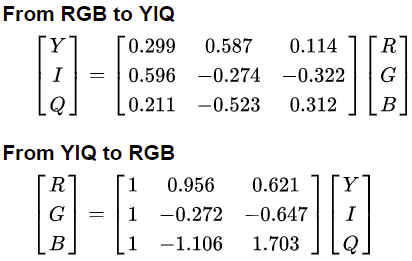


Cargamos en memoria la imagen y le damos una previsualizacion:

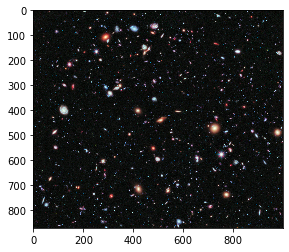

In [3]:
img_1 = img.imread('imageio:hubble_deep_field.png')
plt.imshow(img_1)

Consultamos algunas caracteristicas basicas:

In [4]:
print(f'Dimensiones de la imagen (filas,columnas,canales): {img_1.shape}')

Dimensiones de la imagen (filas,columnas,canales): (872, 1000, 3)


- Con el proposito de transformar la imagen inicial del espacio RGB al espacio YIQ se define una matriz `M_YIQ ` y una funcion que permite esta transformacion `apply_matrix `. 

In [5]:
def apply_matrix(img, M, norm = True):
    """
    Convierte una imagen RGB sin normalizar a una normalida y luego a un espacio de color
    :parametro img -> p.e. una imagen en RGB
    :retorna: una imagen en el espacio de color determinado por M
    : M -> Matriz de la tranformacion lineal (p.e. de RGB a YIQ)
    """
    if norm:
        img = img/255 #Normalización de la imagen

    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)



In [6]:
# Matriz que transforma al espacio YIQ 
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.596, -0.274, -0.322],
                  [0.211, -0.523, 0.312]])

# para seleccionar canal rojo:
M_R = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])

# Matriz que transforma al espacio RGB 
M_RGB = np.array([[1, 0.956, 0.621],
                  [1, -0.272, -0.647],
                  [1, -1.106, 1.703]])


In [7]:
# ejemplo de extraccion del canal rojo
img_R = apply_matrix(img_1, M_R)

In [8]:
# Transformando la matriz a un nuevo espacio
img_YIQ = apply_matrix(img_1, M_YIQ)

Text(0.5, 1.0, 'Canal Rojo')

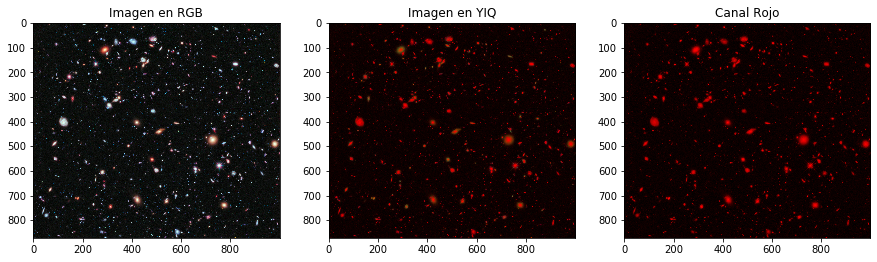

In [9]:
# RGB, YIQ, Rojo:
fig, axes = plt.subplots(1, 3, figsize=(15,9))
axes[0].imshow(img_1)
axes[0].set_title('Imagen en RGB')
axes[1].imshow(np.clip(img_YIQ, 0, 1))
axes[1].set_title('Imagen en YIQ')
axes[2].imshow(img_R)
axes[2].set_title('Canal Rojo')

In [10]:
# control sobre los valores:
print(img_1[300, 150])
print(img_YIQ[300, 150])

[26 21 18]
[0.08687451 0.01547451 0.00046667]


Se extraen cada uno de los canales de la imagen transformada al espacio de color `YIQ` y se consultan sus respectivos minimos y maximos. Verificamos que:  
- $Y'<=1$
- $-0.5957 < I'< 0.5957$
- $-0.5226 < Q'< 0.5226$

In [11]:
# Separacion de canales - Almacenandolos en variables independientes:
Y = img_YIQ[:,:,0]
I = img_YIQ[:,:,1]
Q = img_YIQ[:,:,2]

In [12]:
#controlamos valores iniciales
print(f'Min y Max Y: {np.min(Y),np.max(Y)}')
print(f'Min y Max I: {np.min(I),np.max(I)}')
print(f'Min y Max Q: {np.min(Q),np.max(Q)}')
print(f'Min y Max Original: {np.min(img_1),np.max(img_1)}')

Min y Max Y: (0.0, 0.9999999999999999)
Min y Max I: (-0.5527764705882353, 0.42736470588235287)
Min y Max Q: (-0.1766509803921569, 0.23793333333333333)
Min y Max Original: (0, 255)


In [13]:
# Multiplicamos los canales YIQ por los coeficientes alfa y beta:
alfa = 0.5
beta = 0.8

y_p = Y*alfa
i_p = I*beta
q_p = Q*beta

In [14]:
# Controlamos los rangos resultantes:
print(f"Min y Max Y': {np.min(y_p),np.max(y_p)}")
print(f"Min y Max I': {np.min(i_p),np.max(i_p)}")
print(f"Min y Max Q': {np.min(q_p),np.max(q_p)}")


Min y Max Y': (0.0, 0.49999999999999994)
Min y Max I': (-0.4422211764705883, 0.34189176470588234)
Min y Max Q': (-0.14132078431372552, 0.19034666666666666)


In [15]:
# Apilando las anteriores para regresar al espacio RGB:
yiq_p = np.stack([y_p,i_p,q_p], axis=2)

# Retornando a RGB - Transformada:
img_RGBT = apply_matrix(yiq_p, M_RGB, False)

In [16]:
print(f"Min y Max para img_RGBT: {np.min(img_RGBT),np.max(img_RGBT)}")

Min y Max para img_RGBT: (-0.1871336031372549, 0.643715871372549)


In [17]:
# Truncamos los valores RGB al rango [0,1] (utilizando np.clip):
img_RGBT = np.clip(img_RGBT, 0, 1)
print(f"Min y Max para img_RGBT: {np.min(img_RGBT),np.max(img_RGBT)}")

Min y Max para img_RGBT: (0.0, 0.643715871372549)


Text(0.5, 1.0, 'Imagen RGB Transformada')

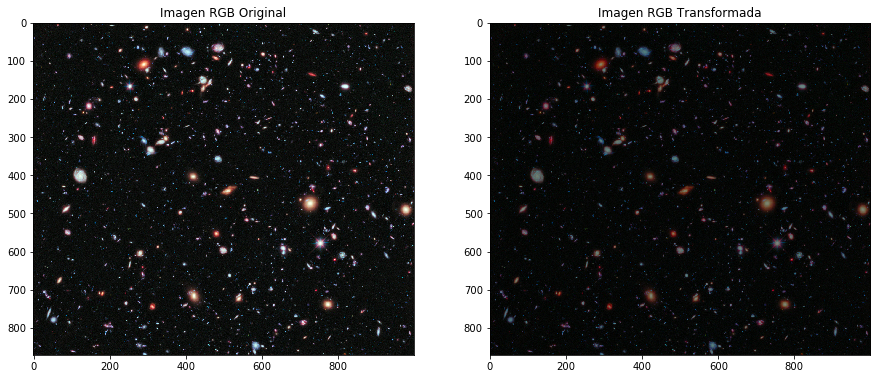

In [18]:
# Original vs Transformada
fig, axes = plt.subplots(1, 2, figsize=(15,9))
axes[0].imshow(img_1)
axes[0].set_title('Imagen RGB Original')
axes[1].imshow(img_RGBT)
axes[1].set_title('Imagen RGB Transformada')


(array([291., 480., 694., 720., 466., 197.,  77.,  32.,  13.,   3.,   0.,
          5.,   4.,   0.,   2.,   2.,   2.,   0.,   0.,   1.,   1.,   1.,
          0.,   1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.00887406, 0.01774812, 0.02662218, 0.03549624,
        0.0443703 , 0.05324436, 0.06211842, 0.07099248, 0.07986654,
        0.0887406 , 0.09761466, 0.10648872, 0.11536278, 0.12423684,
        0.1331109 , 0.14198496, 0.15085903, 0.15973309, 0.16860715,
        0.17748121, 0.18635527, 0.19522933, 0.20410339, 0.21297745,
        0.22185151, 0.23072557, 0.23959963, 0.24847369, 0.25734775,
        0.26622181, 0.27509587, 0.28396993, 0.29284399, 0.30171805,
        0.31059211, 0.31946617, 0.32834023, 0.33721429, 0.34608835,
        0.35496241, 0.36383647, 0.37271053, 0.38158459, 0.39045865,
        0.39933271, 0.40820677, 0.41708083, 0.

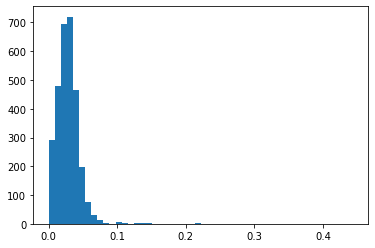

In [19]:
plt.hist(img_RGBT[0].ravel(),bins=50)

# Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.

# Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto:
1. Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
2. Detectores de bordes: Laplaciano v4, Sobel 4 orientaciones.
3. Pasabanda.

Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma- temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kernel es 3x3 y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

# Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana
- Top-hat
Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

# Ejercicios Optativos. Ver presentación para más detalle
Recordá que hay ejercicios opcionales especificados en la presentación correspondiente al trabajo práctico.